In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')
moons = pd.read_csv('../DATA/cluster_moons.csv')
circles = pd.read_csv('../DATA/cluster_circles.csv')
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

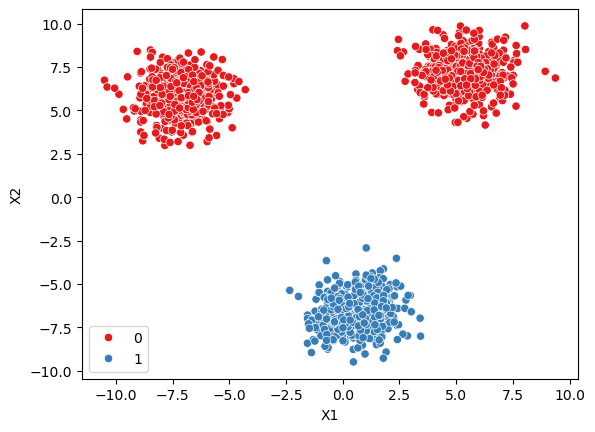

In [4]:
display_categories(model, blobs)

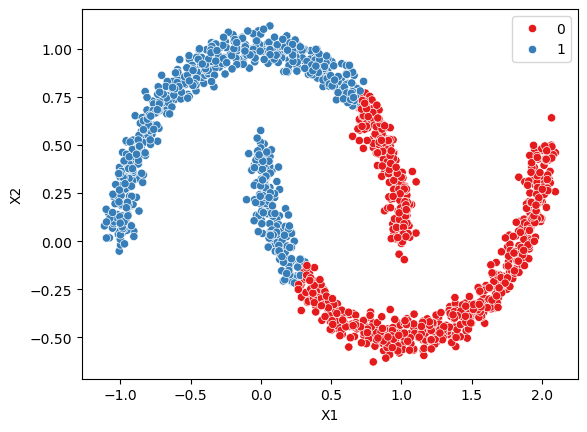

In [5]:
display_categories(model, moons)

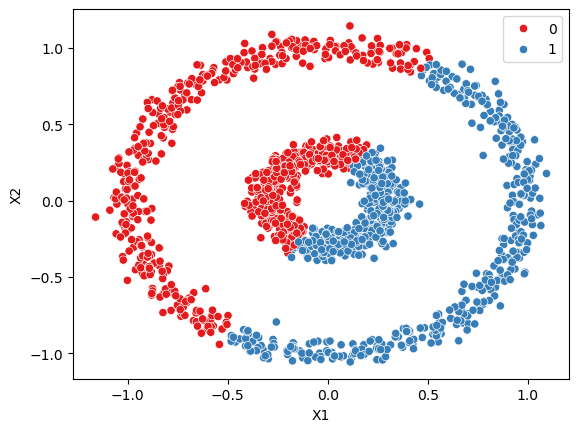

In [6]:
display_categories(model, circles)

In [10]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.6)

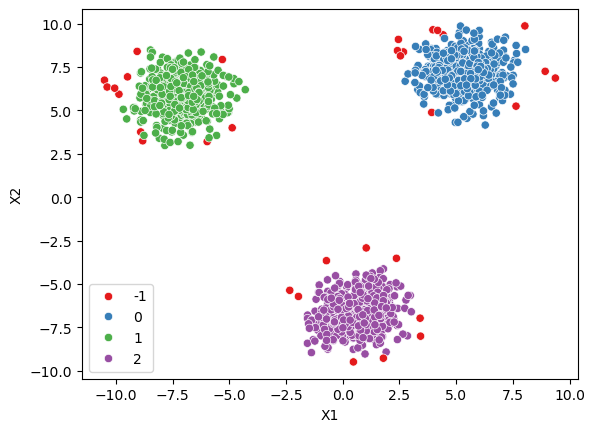

In [8]:
display_categories(model, blobs)

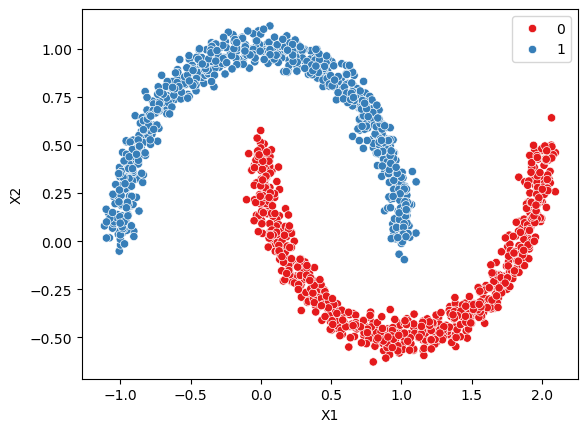

In [12]:
model = DBSCAN(eps = 0.15)
display_categories(model, moons)

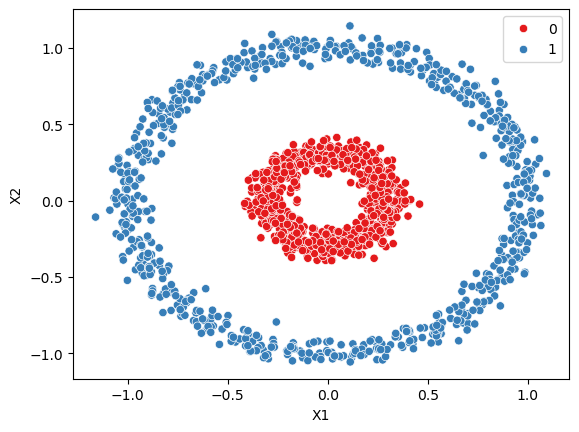

In [13]:
model = DBSCAN(eps = 0.15)
display_categories(model, circles)

In [15]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

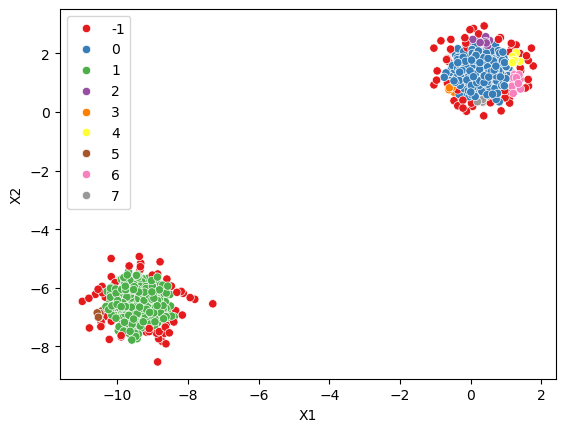

In [16]:
display_categories(model,two_blobs)

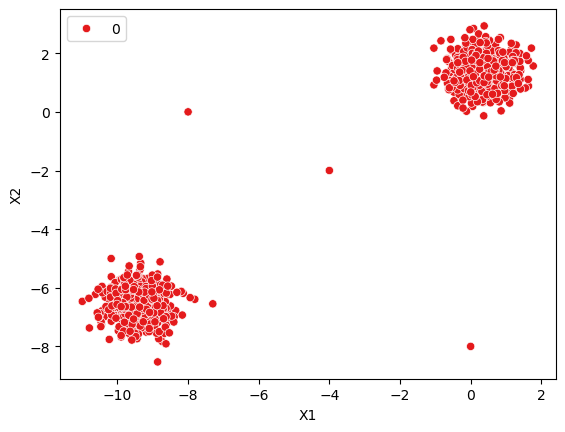

In [17]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

In [18]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

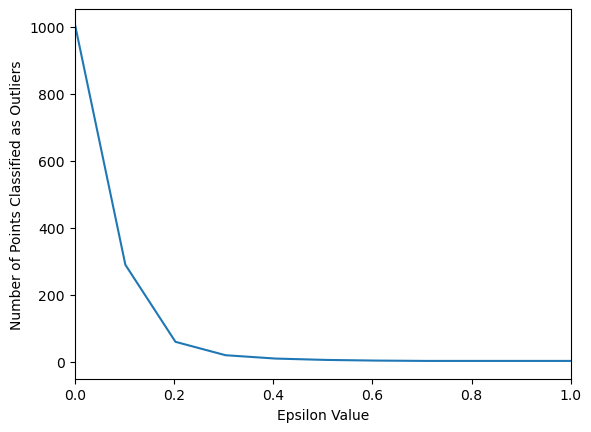

In [20]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1);

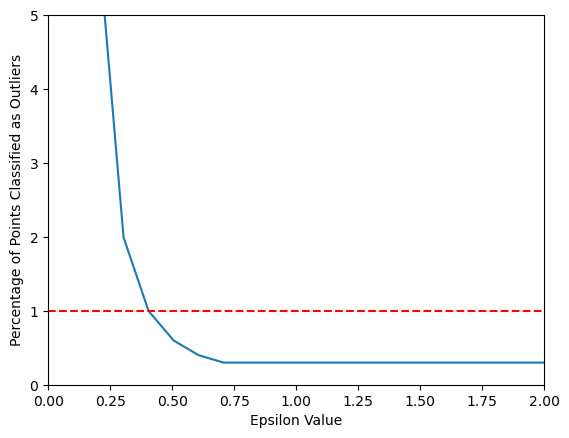

In [21]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--');

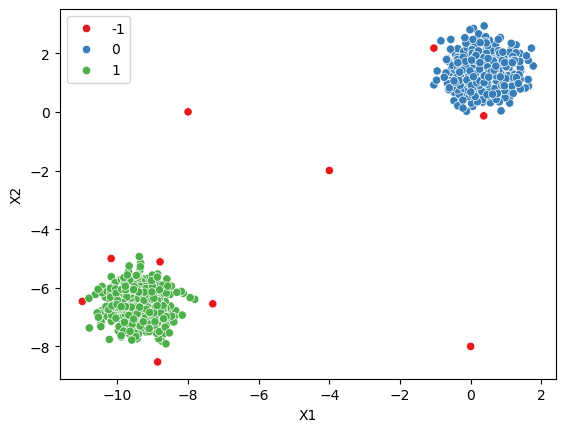

In [22]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

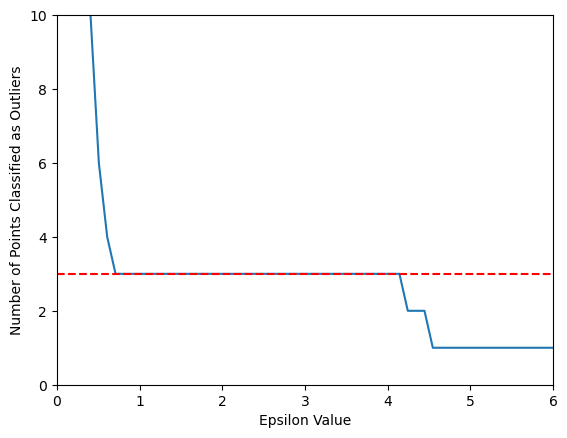

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

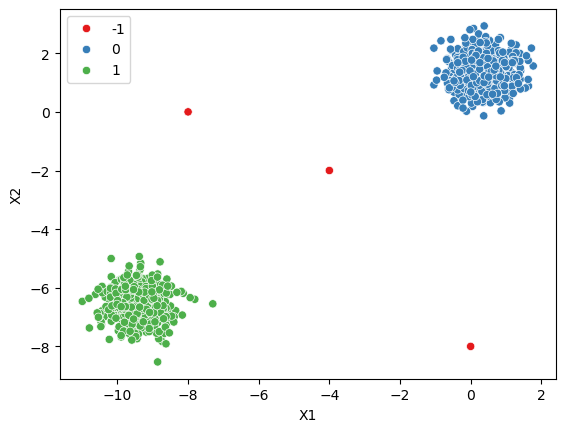

In [24]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

In [25]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

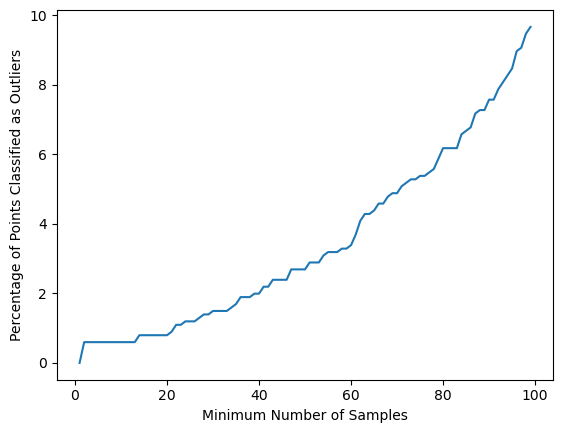

In [26]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

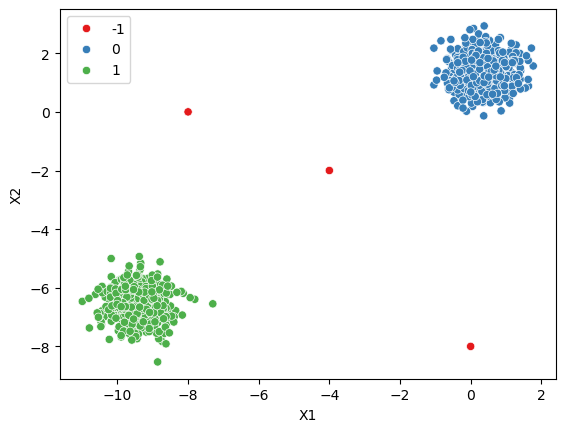

In [27]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)